# High Systolic blood pressure model

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import warnings
import sklearn

from scipy.stats import uniform, loguniform

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import BernoulliNB

from IPython.display import display
from IPython.display import HTML
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute._base import SimpleImputer as Imputer 
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
   
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

### We maximize the ROC AUC

In [2]:
score_obj = 'roc_auc'

#### Split training and validation set

In [3]:
df_train = pd.read_pickle("HT_train.pkl")  

df_train, df_valid = train_test_split(    df_train,  
                                                train_size = .9, 
                                                test_size = .1)

#### Balance the training set by downsampling

In [4]:
from sklearn.utils import resample

df_train_p = df_train[(df_train.HyperSystolic == 1)]
df_train_n = df_train[(df_train.HyperSystolic == 0)] 

samples = min(df_train_p.shape[0],df_train_n.shape[0])

df_train_p_dnsampled = resample(df_train_p, replace=False, n_samples=samples)
df_train_n_dnsampled = resample(df_train_n, replace=False, n_samples=samples) 

df_train = pd.concat([df_train_n_dnsampled,df_train_p_dnsampled])

 

#### Create training and validation sets.

The training set is balanced by downsampling, the valid_bal set is balanced, the second valid set has the original (imbalanced) distribution.

In [5]:
df_train, df_valid_bal = train_test_split(df_train, 
                                          train_size = .9, 
                                          test_size = .1)


Z_train = df_train.drop(['HyperSystolic','HyperDiastolic','Hypertensive'], axis = 1)
w_train = df_train['HyperSystolic']

Z_valid_bal = df_valid_bal.drop(['HyperSystolic','HyperDiastolic','Hypertensive'], axis = 1)
w_valid_bal = df_valid_bal['Hypertensive']

Z_valid = df_valid.drop(['HyperSystolic','HyperDiastolic','Hypertensive'], axis = 1)
w_valid = df_valid['HyperSystolic']

 

### Features for the model:

In [6]:

print('The features for our hypertension model are as follows:\n')
print(', '.join(Z_train.columns))
print('\nThe dimensions of the hypertension training set are ', Z_train.shape)
print('\nThe dimensions of the hypertension validation set are ', Z_valid.shape)

The features for our hypertension model are as follows:

Age, Education, Gender, HHIncome, Alcohol, HyperHist, CholHist, ChestPain, Shortness, DiabHist, Frozen, FastFood, ReadytoEat, MealsOut, Milk, KidneyStones, WeakKidneys, UrineLeak, FeltBad, HoursWorked, Dental, Pesticides, ModRec, WalkBike, VigRec, ModWork, VigWork, PregnantEver, PregnantNow, HoursSlept, Smoke100, SmokeNow, Pulse, Weight, ArmCirc, BMI, LegLen, ArmLen, Waist, FoodFastHours, SessionTime, MaxWeightRatio, DiabAgeYoung, DiabAgeOld, MexAm, Hisp, White, Black

The dimensions of the hypertension training set are  (14446, 48)

The dimensions of the hypertension validation set are  (2742, 48)


### Parameter search for several models



Decision Tree Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      7193
         1.0       0.70      0.77      0.74      7253

    accuracy                           0.72     14446
   macro avg       0.73      0.72      0.72     14446
weighted avg       0.73      0.72      0.72     14446

Decision Tree Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.68      0.67      0.68       735
         1.0       0.73      0.73      0.73       871

    accuracy                           0.70      1606
   macro avg       0.70      0.70      0.70      1606
weighted avg       0.70      0.70      0.70      1606

Decision Tree Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.87      0.65      0.74      1901
         1.0       0.49      0.77      0.60       841

    accuracy                       

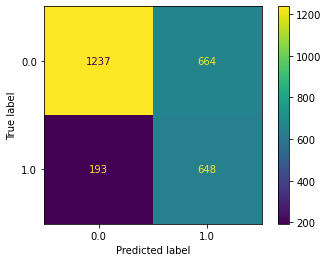

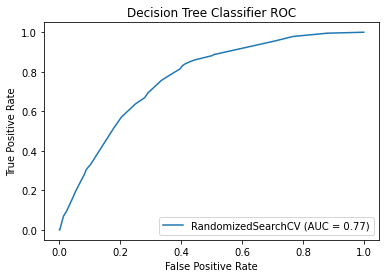

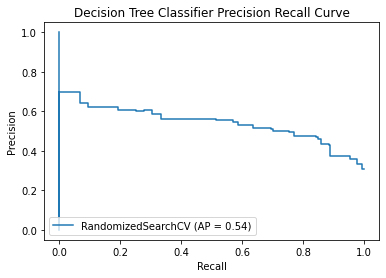

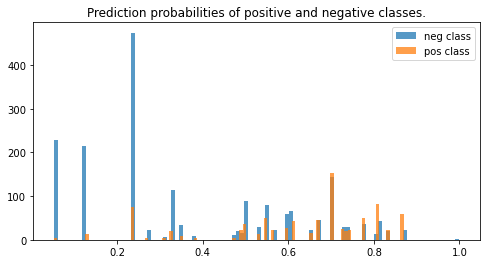







Random Forest Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      7193
         1.0       0.82      0.87      0.84      7253

    accuracy                           0.84     14446
   macro avg       0.84      0.84      0.84     14446
weighted avg       0.84      0.84      0.84     14446

Random Forest Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68       735
         1.0       0.73      0.75      0.74       871

    accuracy                           0.71      1606
   macro avg       0.71      0.71      0.71      1606
weighted avg       0.71      0.71      0.71      1606

Random Forest Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.87      0.64      0.74      1901
         1.0       0.49      0.78      0.61       841

    accuracy                   

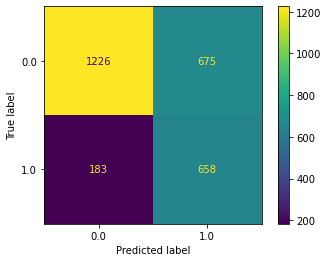

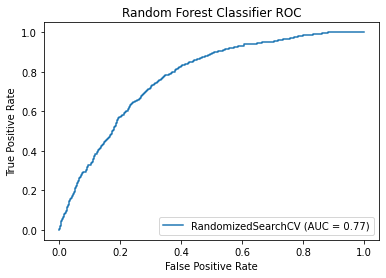

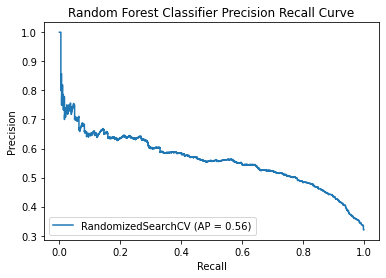

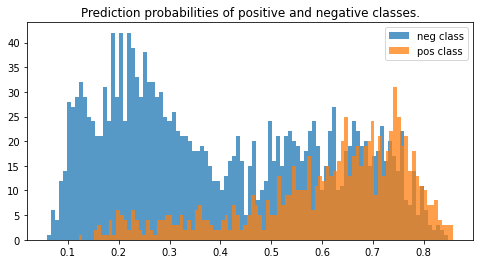







Gradient Boosting Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.76      0.67      0.71      7193
         1.0       0.71      0.79      0.75      7253

    accuracy                           0.73     14446
   macro avg       0.73      0.73      0.73     14446
weighted avg       0.73      0.73      0.73     14446

Gradient Boosting Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.68      0.67      0.68       735
         1.0       0.73      0.74      0.73       871

    accuracy                           0.71      1606
   macro avg       0.71      0.71      0.71      1606
weighted avg       0.71      0.71      0.71      1606

Gradient Boosting Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.87      0.65      0.74      1901
         1.0       0.50      0.79      0.61       841

    accuracy       

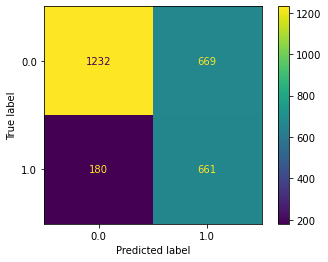

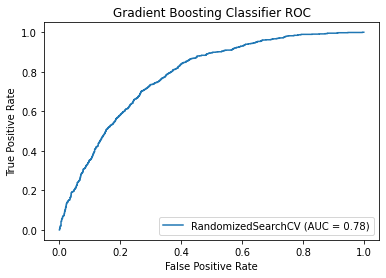

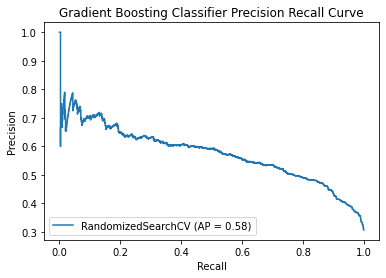

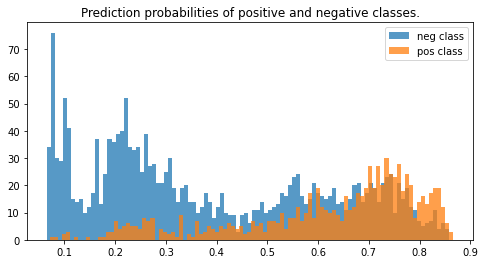







Logistic Regression Train Set Report
              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72      7193
         1.0       0.72      0.73      0.73      7253

    accuracy                           0.72     14446
   macro avg       0.72      0.72      0.72     14446
weighted avg       0.72      0.72      0.72     14446

Logistic Regression Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.66      0.73      0.69       735
         1.0       0.75      0.69      0.72       871

    accuracy                           0.70      1606
   macro avg       0.70      0.71      0.70      1606
weighted avg       0.71      0.70      0.70      1606

Logistic Regression Validation Set Report
              precision    recall  f1-score   support

         0.0       0.85      0.70      0.77      1901
         1.0       0.51      0.73      0.60       841

    accuracy                           0.71   

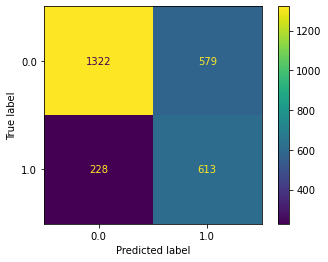

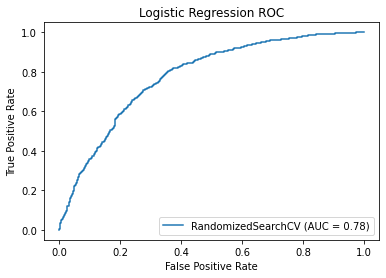

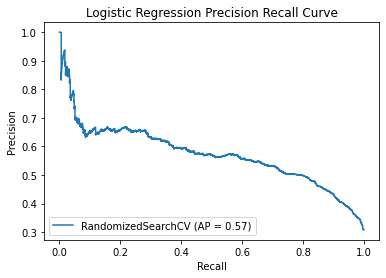

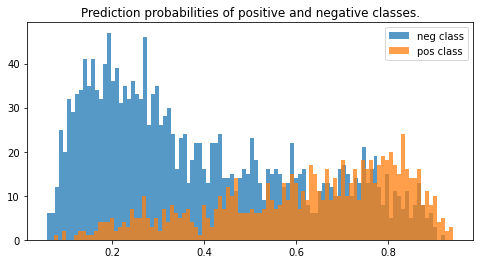







Support Vector (rbf kernel) Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      7193
         1.0       0.72      0.77      0.74      7253

    accuracy                           0.73     14446
   macro avg       0.73      0.73      0.73     14446
weighted avg       0.73      0.73      0.73     14446

Support Vector (rbf kernel) Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.69       735
         1.0       0.74      0.71      0.72       871

    accuracy                           0.71      1606
   macro avg       0.71      0.71      0.71      1606
weighted avg       0.71      0.71      0.71      1606

Support Vector (rbf kernel) Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.87      0.67      0.76      1901
         1.0       0.51      0.77      0.61 

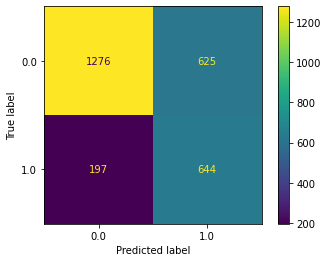

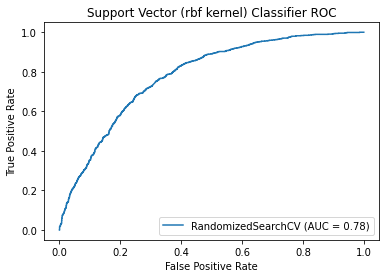

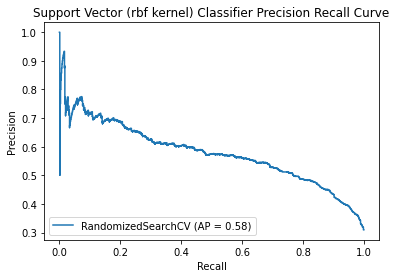

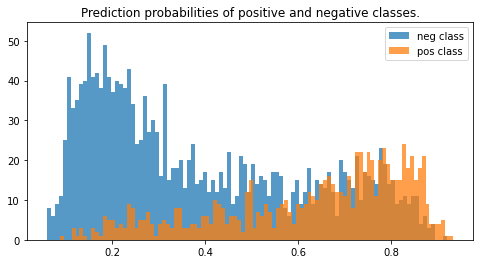







Support Vector (polynomial kernel) Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      7193
         1.0       0.71      0.79      0.75      7253

    accuracy                           0.73     14446
   macro avg       0.74      0.73      0.73     14446
weighted avg       0.74      0.73      0.73     14446

Support Vector (polynomial kernel) Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68       735
         1.0       0.73      0.75      0.74       871

    accuracy                           0.71      1606
   macro avg       0.71      0.71      0.71      1606
weighted avg       0.71      0.71      0.71      1606

Support Vector (polynomial kernel) Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.87      0.64      0.73      1901
         1.0       0.49

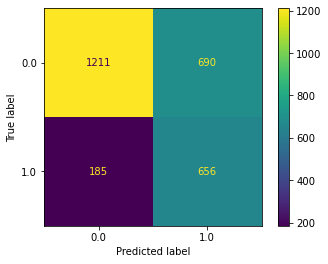

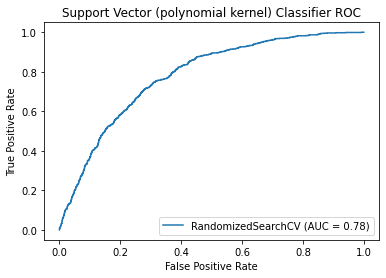

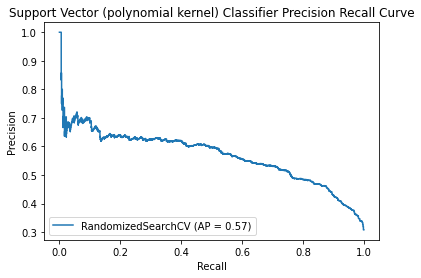

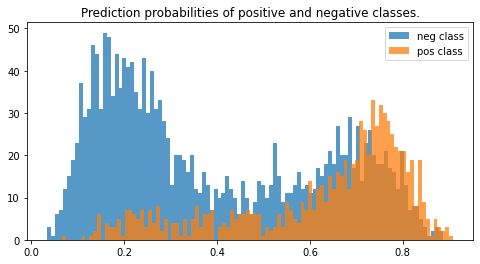







XGB Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72      7193
         1.0       0.71      0.80      0.75      7253

    accuracy                           0.74     14446
   macro avg       0.74      0.74      0.74     14446
weighted avg       0.74      0.74      0.74     14446

XGB Classifier Balanced Validation Set Report
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68       735
         1.0       0.73      0.75      0.74       871

    accuracy                           0.71      1606
   macro avg       0.71      0.71      0.71      1606
weighted avg       0.71      0.71      0.71      1606

XGB Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.87      0.65      0.74      1901
         1.0       0.50      0.79      0.61       841

    accuracy                           0.69      2742
   macr

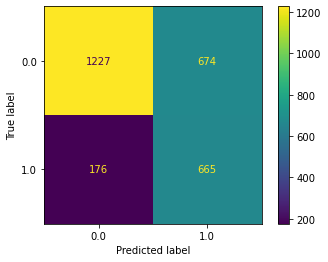

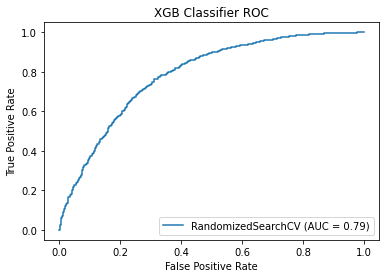

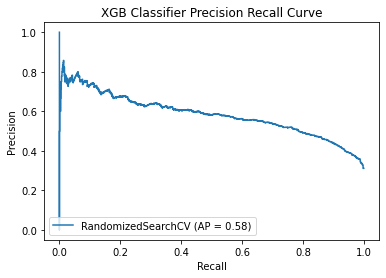

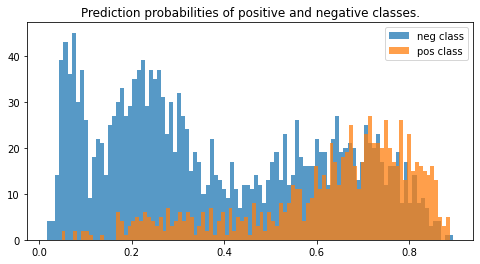

In [7]:

models = {
    'Decision Tree Classifier':{
        'algo': DecisionTreeClassifier(), 
        'n_search':20,
        'grid': {'decisiontreeclassifier__max_depth':list(range(1,30))}
    },
    'Random Forest Classifier':{
        'algo': RandomForestClassifier(), 
        'n_search':20,
        'grid': {'randomforestclassifier__max_depth':list(range(1,20)),
               'randomforestclassifier__n_estimators':list(range(50,250,25)),
                'randomforestclassifier__criterion':['gini','entropy']}
    },
    'Gradient Boosting Classifier':{
        'algo': GradientBoostingClassifier(),  
        'n_search':20,
        'grid':  {'gradientboostingclassifier__max_depth': list(range(1,20)), 
               'gradientboostingclassifier__n_estimators': list(range(50,250,25)),
               'gradientboostingclassifier__loss': ['deviance','exponential']}
    },
    'Logistic Regression':{
        'algo': LogisticRegression(), 
        'n_search':20,
        'grid':{'logisticregression__C': loguniform(1e-2 , 1e2) }
    },
    'Support Vector (rbf kernel) Classifier':{
        'algo': SVC(kernel = 'rbf',probability=True), 
        'n_search':20,
        'grid': { 'svc__gamma': loguniform(1e-4, 1e0),
               'svc__C': loguniform(1, 1e3)} 
    },
    'Support Vector (polynomial kernel) Classifier':{
        'algo': SVC(kernel = 'poly',probability=True), 
        'n_search':20,
        'grid':  {'svc__C': loguniform(1, 1e3),
               'svc__degree': [2,3]}  
    },
    'XGB Classifier':{
        'algo': XGBClassifier(use_label_encoder=False,eval_metric = 'logloss'),  
        'n_search': 40,
        'grid': {'xgbclassifier__eta': loguniform(1e-2, 1e0), 
              'xgbclassifier__gamma': loguniform(1e-8 , 1e-2),
              'xgbclassifier__lambda': loguniform(1e-2 , 1e1),
              'xgbclassifier__alpha': loguniform(1e-8 , 1e-4),
              'xgbclassifier__max_depth': [3,4,5,6,7,8]} 
    }
}

for name, model in models.items():
    
    algorithm = model['algo']
    n_search = model['n_search']
    grid_params = model['grid'] 
       
    pipeline = make_pipeline( MinMaxScaler(),algorithm )
    
    model_grid = RandomizedSearchCV(pipeline,grid_params, 
                                    cv = 5, n_jobs = 2, 
                                    scoring = score_obj, n_iter=n_search)
    
    model_grid.fit(Z_train, w_train)
    model['trained'] = model_grid
    
    print('\n')
    
    HTML('<font size = 7>'+name+'</font>')
    
    w_train_pred = model_grid.predict(Z_train)
    print(name, 'Train Set Report')
    print(classification_report(w_train, w_train_pred))
    
    w_valid_bal_pred = model_grid.predict(Z_valid_bal)
    print(name, 'Balanced Validation Set Report')
    print(classification_report(w_valid_bal, w_valid_bal_pred))
    
    w_valid_pred = model_grid.predict(Z_valid)
    print(name, 'Validation Set Report')
    print(classification_report(w_valid, w_valid_pred))
  

    
    plot_confusion_matrix(model_grid, Z_valid, w_valid)
    plt.show()
    
    metrics.plot_roc_curve(model_grid,Z_valid,w_valid)
    title = name + ' ROC'
    plt.title(title)
    plt.show()
    
    metrics.plot_precision_recall_curve(model_grid,Z_valid,w_valid)
    title = name + ' Precision Recall Curve'
    plt.title(title)
    plt.show()
    
 
    try: 
        w_valid_prob_pred = model_grid.predict_proba(Z_valid)[:, 1]
        plt.figure(figsize=(8,4))
        plt.hist(w_valid_prob_pred[np.where(w_valid == 0)], bins=100, alpha=0.75, label='neg class')
        plt.hist(w_valid_prob_pred[np.where(w_valid == 1)], bins=100, alpha=0.75, label='pos class')
        plt.legend()
        plt.title('Prediction probabilities of positive and negative classes.')
        plt.show()
    except:
        pass
         
    model['ROC_AUC_score'] = metrics.roc_auc_score(w_valid,w_valid_prob_pred)
    model['Best Parameters'] = model_grid.best_params_
    
    
    print('\n'*3)
    
    

### Top models

In [8]:
f1_dict = {name:models[name]['ROC_AUC_score'] for name in models}
from collections import Counter
best_models = [x[0] for x in Counter(f1_dict).most_common(3)]
best_models = {x: models[x] for x in best_models }
 
for name, model in best_models.items():
    print(f'Model: {name}')
    print(f"ROC AUC score: {model['ROC_AUC_score']:.4}")
    print('Parameters:')
    for parameter, value in model['Best Parameters'].items():
        print(f"{parameter.split('__')[1]}: {value}")
    print('\n'*2)

Model: XGB Classifier
ROC AUC score: 0.7854
Parameters:
alpha: 7.992727311727906e-06
eta: 0.05648702620729644
gamma: 2.5315043225524603e-06
lambda: 0.1348800453813095
max_depth: 4



Model: Gradient Boosting Classifier
ROC AUC score: 0.7825
Parameters:
n_estimators: 50
max_depth: 3
loss: deviance



Model: Support Vector (rbf kernel) Classifier
ROC AUC score: 0.7802
Parameters:
C: 35.149881312558485
gamma: 0.0031960937339898265





### Stacking classifier

Stacking Classifier Train Report
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      7193
         1.0       0.71      0.78      0.75      7253

    accuracy                           0.73     14446
   macro avg       0.74      0.73      0.73     14446
weighted avg       0.74      0.73      0.73     14446

Stacking Classifier Validation Report
              precision    recall  f1-score   support

         0.0       0.87      0.66      0.75      1901
         1.0       0.50      0.78      0.61       841

    accuracy                           0.70      2742
   macro avg       0.69      0.72      0.68      2742
weighted avg       0.76      0.70      0.71      2742



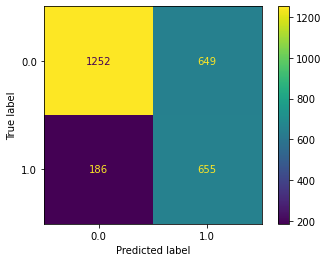

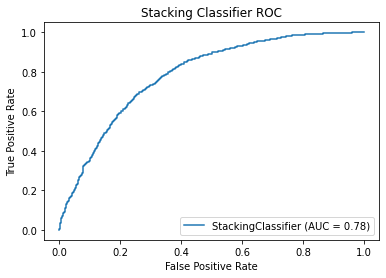

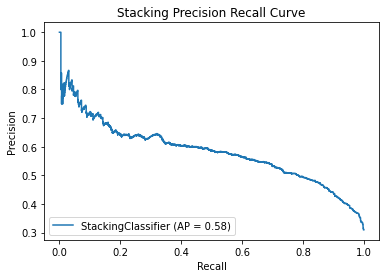

Stacking classifier ROC AUC score: 0.7847.


In [12]:
estimators = [
    ('GBC', GradientBoostingClassifier(loss = 'deviance',
                          n_estimators = 50 ,max_depth = 3)),
    ('XGB',XGBClassifier(use_label_encoder=False,eval_metric = 'logloss',
                        alpha = 8e-6, eta = 0.056, gamma = 2.5e-6,
                        reg_lambda = 0.13, max_depth = 4)),
    ('svc_rbf',make_pipeline( MinMaxScaler(),SVC(kernel = 'rbf',probability=True,
                                                 C = 35, gamma = 3.2e-3)))
]
stack = StackingClassifier(estimators=estimators,
                          final_estimator = LogisticRegression())
stack.fit(Z_train, w_train)

w_train_pred = stack.predict(Z_train)
print('Stacking Classifier Train Report')
print(classification_report(w_train, w_train_pred))
w_valid_pred = stack.predict(Z_valid)
print('Stacking Classifier Validation Report')
print(classification_report(w_valid, w_valid_pred))
                
plot_confusion_matrix(stack, Z_valid, w_valid)
plt.show()
    
metrics.plot_roc_curve(stack,Z_valid,w_valid)
title = 'Stacking Classifier ROC'
plt.title(title)
plt.show()

metrics.plot_precision_recall_curve(stack,Z_valid,w_valid)
title = 'Stacking Precision Recall Curve'
plt.title(title)
plt.show()

w_valid_prob_pred = stack.predict_proba(Z_valid)[:, 1]
ROC_AUC_score = metrics.roc_auc_score(w_valid,w_valid_prob_pred)

print(f'Stacking classifier ROC AUC score: {ROC_AUC_score:.4}.')

The stacked classifier does not appear to improve upon the XGB classifier, thus we will save the XGB classifier for further use.

In [13]:
from joblib import dump, load
clf = models['XGB Classifier']['trained']
dump(clf, 'SystolicClf.joblib') 

['SystolicClf.joblib']